My neural net says beta is: [-2.31739259  4.49421358  9.32971096] for task 3
My neural net says beta is: [-7.7912693   2.70210457  0.90863514] for task 4


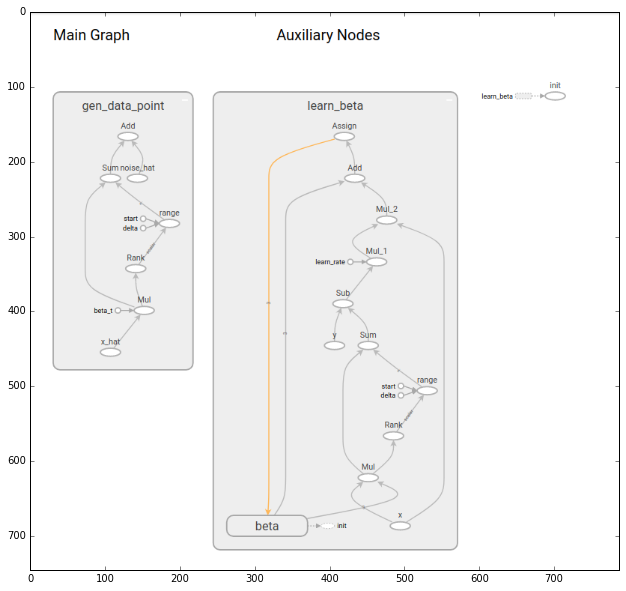

In [4]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas
import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Part 1
'''
with tf.name_scope("gen_data_point") as scope:
    # True Slope and Slope Intercept
    m_t = tf.constant(-6.7, dtype=tf.float32, name='true_slope')
    b_t = tf.constant(2.0, dtype=tf.float32, name='true_intercept')
    # Added noise
    noise = tf.random_uniform(shape=[], minval=-1.0, maxval=1.0, dtype=tf.float32, name='noise')
    # Pick a random x
    x = tf.random_uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32, name='x')
    # Calculate y which is the line evaluated at x plus noise
    y = tf.add(tf.add(tf.multiply(m_t, x), b_t), noise)

# for i in range(100):
#     print(sess.run(y))

# Part 2
with tf.name_scope("delta_optimizer") as scope:
    # Learning rate
    c = tf.constant(0.005, dtype=tf.float32, name='learn_rate')
    m = tf.Variable(tf.random_uniform(shape=[], minval = -10.0, maxval = 10.0,  name='slope'))
    b = tf.Variable(tf.random_uniform(shape=[],minval=-10.0, maxval=10.0, name = 'intercept'))
    net = tf.add(tf.multiply(m, x), b)
    # delta = tf.multiply(tf.subtract(y, net), c)
    delta = (y-net)*c
    update_m = tf.assign(m, tf.add(m, tf.multiply(x, delta)))
    update_b = tf.assign(b, tf.add(b, delta))




init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter("./tf_logs",sess.graph)
tf.summary.scalar('m', m)
tf.summary.scalar('b', b)
merged = tf.summary.merge_all()
for i in range(1000):
    _, _, ss = sess.run([update_m, update_b, merged])
    # sess.run(update_b)
    # ss = sess.run(merged)
    writer.add_summary(ss,i)
writer.close()
'''

# Part 3
with tf.name_scope("gen_data_point"):
    # True beta values
    beta_t = tf.constant([-2.3, 4.5, 9.4], dtype = tf.float32, name='beta_t')
    # Noise added to inputs
    noise_hat = tf.placeholder(tf.float32, None, name = 'noise_hat')
    # Inputs
    x_hat = tf.placeholder(tf.float32, None, name = 'x_hat')
    # Output
    y_hat = tf.add(tf.reduce_sum(tf.multiply(beta_t, x_hat)), noise_hat)

with tf.name_scope("learn_beta"):
    # Learning Rate
    learning_rate = tf.constant(0.005, dtype = tf.float32, name='learn_rate')
    # Variables to learn
    beta = tf.Variable(np.zeros(3).astype(np.float32),name = 'beta')
    # Placeholders for inputs (generated from gen_data_point)
    x = tf.placeholder(tf.float32, None, name = 'x')
    y = tf.placeholder(tf.float32, None, name = 'y')

    # Calculate delta
    net = tf.reduce_sum(tf.multiply(x,beta))
    delta = tf.multiply(tf.multiply(learning_rate,tf.subtract(y,net)), x)

    # Update beta
    beta_new = tf.assign(beta,tf.add(beta, delta))

with tf.Session() as sess:
    # Initialize stuff
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    writer = tf.summary.FileWriter("./tf_logs",sess.graph)

    for i in range(1000):
        # Generate data
        xx = np.random.uniform(-10,10, size=(2,))
        xx = np.append(xx, [1])
        noise = np.random.uniform(-1,1)
        yy = sess.run(y_hat, feed_dict = {x_hat:xx, noise_hat:noise})

        # Find correct beta
        sess.run(beta_new, feed_dict = {x:xx, y:yy})

    # Print final guess
    print 'My neural net says beta is: {} for task 3'.format(sess.run(beta))

    # Part 4
    # Load Data
    data = pandas.read_csv('foo.csv').as_matrix() # a 1000 by 3 ndarray
    xx = np.zeros(3)
    for i in range(np.shape(data)[0]):
        xx[0:2] = data[i,0:2]
        xx[2] = 1.0
        yy = data[i,2]

        # Find correct beta
        sess.run(beta_new, feed_dict = {x:xx, y:yy})

    # Print final guess
    print 'My neural net says beta is: {} for task 4'.format(sess.run(beta))
    # Close writer
    writer.close()

    # Display Graph
    image = mpimg.imread('tensorflow_graph.jpg')
    plt.figure(figsize = (20,10))
    plt.imshow(image)
    plt.show()